#### Assignment 5

- **Name: Himanshu Ruhela**
- **Roll No: 2018IMT-039**
- **Course: Machine Learning Lab**
- **Course Code: ITIT-4107**
- **Deadline: 23:59, 25 October 2021**

Given iris dataset (https://archive.ics.uci.edu/ml/datasets/iris) with 3 classes and 4 features such as sepals/petals, Length, width etc. for each flower in the dataset. There are 50 instances per class in the dataset. Use Bayes Classifier as your base classifier model. Use 60% samples for training and 40% samples for testing.

1. Perform feature selection on this dataset using forward search.

2. As you select features, until 2 features, plot your right and incorrect classification instances for all classes.

3. For all the set of features selected, plot the accuracies to show the best subset of selected features


## Importing libraries

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

## Loading Data

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# creating dataframe
df = pd.read_csv(data_url, header = None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

X = df.iloc[:, :4].values
y = df['species'].values
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Encode the species type to integers

le = LabelEncoder()
le.fit(df.species)
y = le.transform(df.species)
print(le.classes_)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=69)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Implementing Naive Bayes model

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
classifier = GaussianNB()

fig = plt.figure()

<Figure size 432x288 with 0 Axes>

## Take each feature individually

### Training using sepal_length feature and target variable

Accuracy when feature: sepal length => 0.65


Text(0.5, 1.0, 'Feature: sepal length')

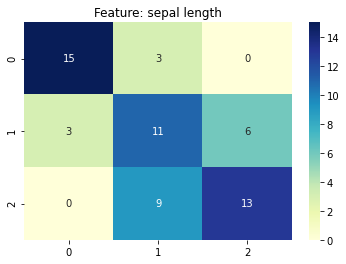

In [6]:
classifier.fit(x_train[:, 0].reshape(-1, 1), y_train)
y_pred = classifier.predict(x_test[:, 0].reshape(-1,1))
cm = confusion_matrix(y_test, y_pred)

print("Accuracy when feature: sepal length =>", accuracy_score(y_test, y_pred))

sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.title("Feature: sepal length")

#### Training model using sepal_width feature and target variable is used


Accuracy when feature: sepal width => 0.55


Text(0.5, 1.0, 'Feature: sepal width')

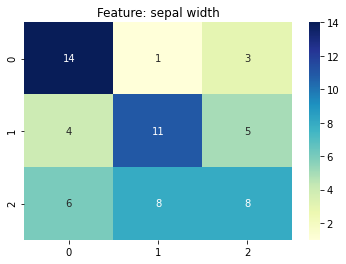

In [7]:
classifier.fit(x_train[:, 1].reshape(-1, 1), y_train)
y_pred = classifier.predict(x_test[:, 1].reshape(-1,1))
cm = confusion_matrix(y_test, y_pred)

print("Accuracy when feature: sepal width =>", accuracy_score(y_test, y_pred))

sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.title("Feature: sepal width")

#### Training model using petal_length feature and target variable is used


Accuracy when feature: petal length => 0.95


Text(0.5, 1.0, 'Feature: petal length')

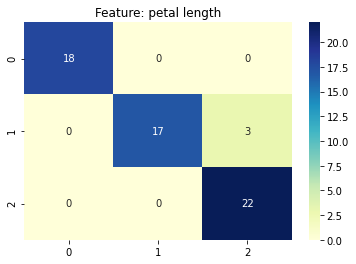

In [8]:
classifier.fit(x_train[:, 2].reshape(-1, 1), y_train)
y_pred = classifier.predict(x_test[:, 2].reshape(-1,1))
cm = confusion_matrix(y_test, y_pred)

print("Accuracy when feature: petal length =>", accuracy_score(y_test, y_pred))

sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.title("Feature: petal length")

#### Training model using petal_width feature and target variable is used


Accuracy when feature: petal width => 0.9333333333333333


Text(0.5, 1.0, 'Feature: petal width')

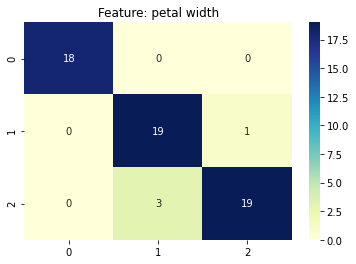

In [9]:
classifier.fit(x_train[:, 3].reshape(-1, 1), y_train)
y_pred = classifier.predict(x_test[:, 3].reshape(-1,1))
cm = confusion_matrix(y_test, y_pred)

print("Accuracy when feature: petal width =>", accuracy_score(y_test, y_pred))

sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.title("Feature: petal width")

## Take Multiple features into consideration

Will try different combination of the features

#### Training model using petal_width and sepal_length as input feature and target variable is used


Accuracy when features: petal_width and sepal_length => 0.95


Text(0.5, 1.0, 'Features: petal width and sepal length')

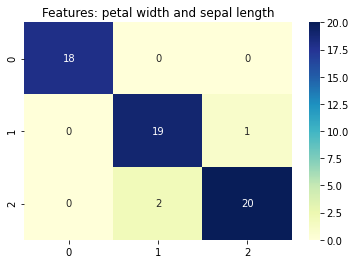

In [10]:
x_input1 = np.array([[inp[0], inp[3]] for inp in x_train])
x_te = np.array([[inp[0], inp[3]] for inp in x_test])
classifier.fit(x_input1, y_train)
y_pred = classifier.predict(x_te)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy when features: petal_width and sepal_length =>", accuracy_score(y_test, y_pred))

sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.title("Features: petal width and sepal length")

#### Training model using petal_width and sepal_width as input feature and target variable is used


Accuracy when features: petal_width and sepal_width => 0.9


Text(0.5, 1.0, 'Features: petal width and sepal width')

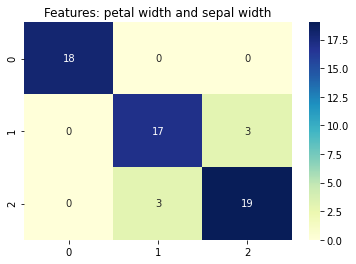

In [11]:
x_input2 = np.array([[inp[1], inp[3]] for inp in x_train])
x_te = np.array([[inp[1], inp[3]] for inp in x_test])
classifier.fit(x_input2, y_train)
y_pred = classifier.predict(x_te)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy when features: petal_width and sepal_width =>", accuracy_score(y_test, y_pred))

sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.title("Features: petal width and sepal width")

#### Training model using petal_width and petal_length as input feature and target variable is used


Accuracy when features: petal_width and petal_length => 0.95


Text(0.5, 1.0, 'Features: petal width and petal length')

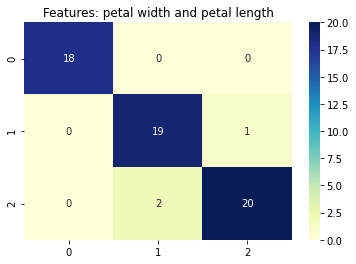

In [12]:
x_input3 = np.array([[inp[2], inp[3]] for inp in x_train])
x_te = np.array([[inp[2], inp[3]] for inp in x_test])
classifier.fit(x_input3, y_train)
y_pred = classifier.predict(x_te)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy when features: petal_width and petal_length =>", accuracy_score(y_test, y_pred))

sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.title("Features: petal width and petal length")

## Petal Width and Petal Length features produce the highest accuracy.